In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("car_data.csv", index_col = False)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.shape

(301, 9)

In [9]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [10]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [12]:
df[(df['Owner'] == 3) & (df['Transmission'] == 'CNG')]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [13]:
print((df['Owner'] == 3).tail())

296    False
297    False
298    False
299    False
300    False
Name: Owner, dtype: bool


In [14]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [15]:
df = pd.get_dummies(df, columns=["Fuel_Type"])

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,False,False,True
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,False,True,False
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,False,False,True
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,False,False,True
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,False,True,False


In [17]:
df = pd.get_dummies(df, columns= ['Selling_type', 'Transmission', 'Owner'])

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Owner_0,Owner_1,Owner_3
0,ritz,2014,3.35,5.59,27000,False,False,True,True,False,False,True,True,False,False
1,sx4,2013,4.75,9.54,43000,False,True,False,True,False,False,True,True,False,False
2,ciaz,2017,7.25,9.85,6900,False,False,True,True,False,False,True,True,False,False
3,wagon r,2011,2.85,4.15,5200,False,False,True,True,False,False,True,True,False,False
4,swift,2014,4.60,6.87,42450,False,True,False,True,False,False,True,True,False,False


In [19]:
df[df['Owner_3'] == True]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Owner_0,Owner_1,Owner_3
85,camry,2006,2.5,23.73,142000,False,False,True,False,True,True,False,False,False,True


In [20]:
df[df['Owner_1'] == True].sum()

Car_Name                   etios gHyosung GT250RBajaj Pulsar 150Bajaj Dis...
Year                                                                   20120
Selling_Price                                                           19.7
Present_Price                                                          33.16
Driven_kms                                                            312344
Fuel_Type_CNG                                                              0
Fuel_Type_Diesel                                                           1
Fuel_Type_Petrol                                                           9
Selling_type_Dealer                                                        4
Selling_type_Individual                                                    6
Transmission_Automatic                                                     0
Transmission_Manual                                                       10
Owner_0                                                                    0

In [21]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Owner_0,Owner_1,Owner_3
17,ertiga,2016,7.75,10.79,43000,False,True,False,True,False,False,True,True,False,False
93,fortuner,2015,23.00,30.61,40000,False,True,False,True,False,True,False,True,False,False


In [22]:
df = df.drop_duplicates()

In [23]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Owner_0,Owner_1,Owner_3


## Visualization

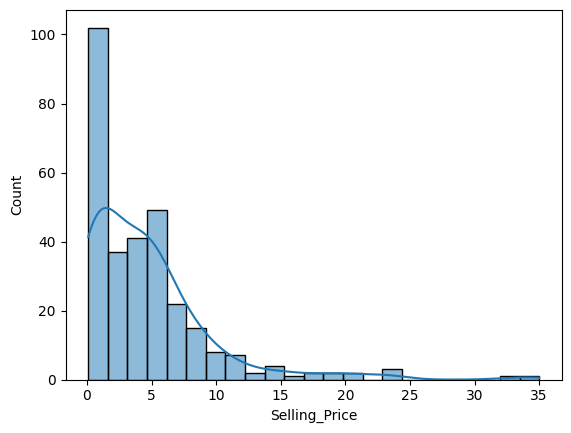

In [24]:
# plt.figure(figure = (10,20))
sns.histplot(df['Selling_Price'], kde = True)
plt.show()

<Axes: xlabel='Present_Price', ylabel='Count'>

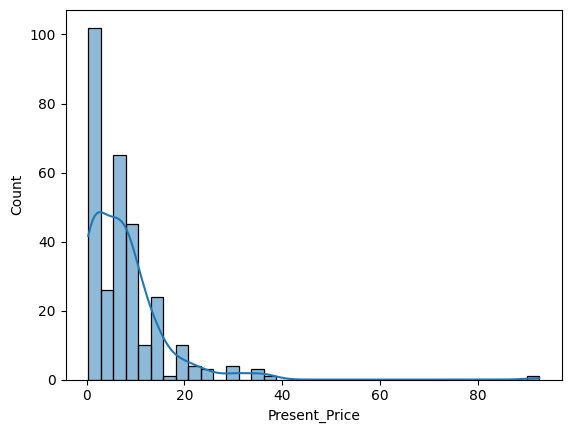

In [25]:
sns.histplot(df['Present_Price'], kde = True)


In [26]:
cor_colum = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']].corr()
cor_colum

,Year,Selling_Price,Present_Price,Driven_kms
Year,1.000000,0.234369,-0.053167,-0.525714
Selling_Price,0.234369,1.000000,0.876305,0.028566
Present_Price,-0.053167,0.876305,1.000000,0.205224
Driven_kms,-0.525714,0.028566,0.205224,1.000000


<Axes: >

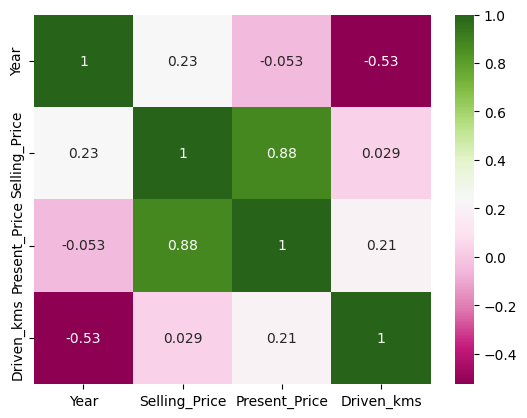

In [27]:
sns.heatmap(cor_colum, annot = True, cmap='PiYG')

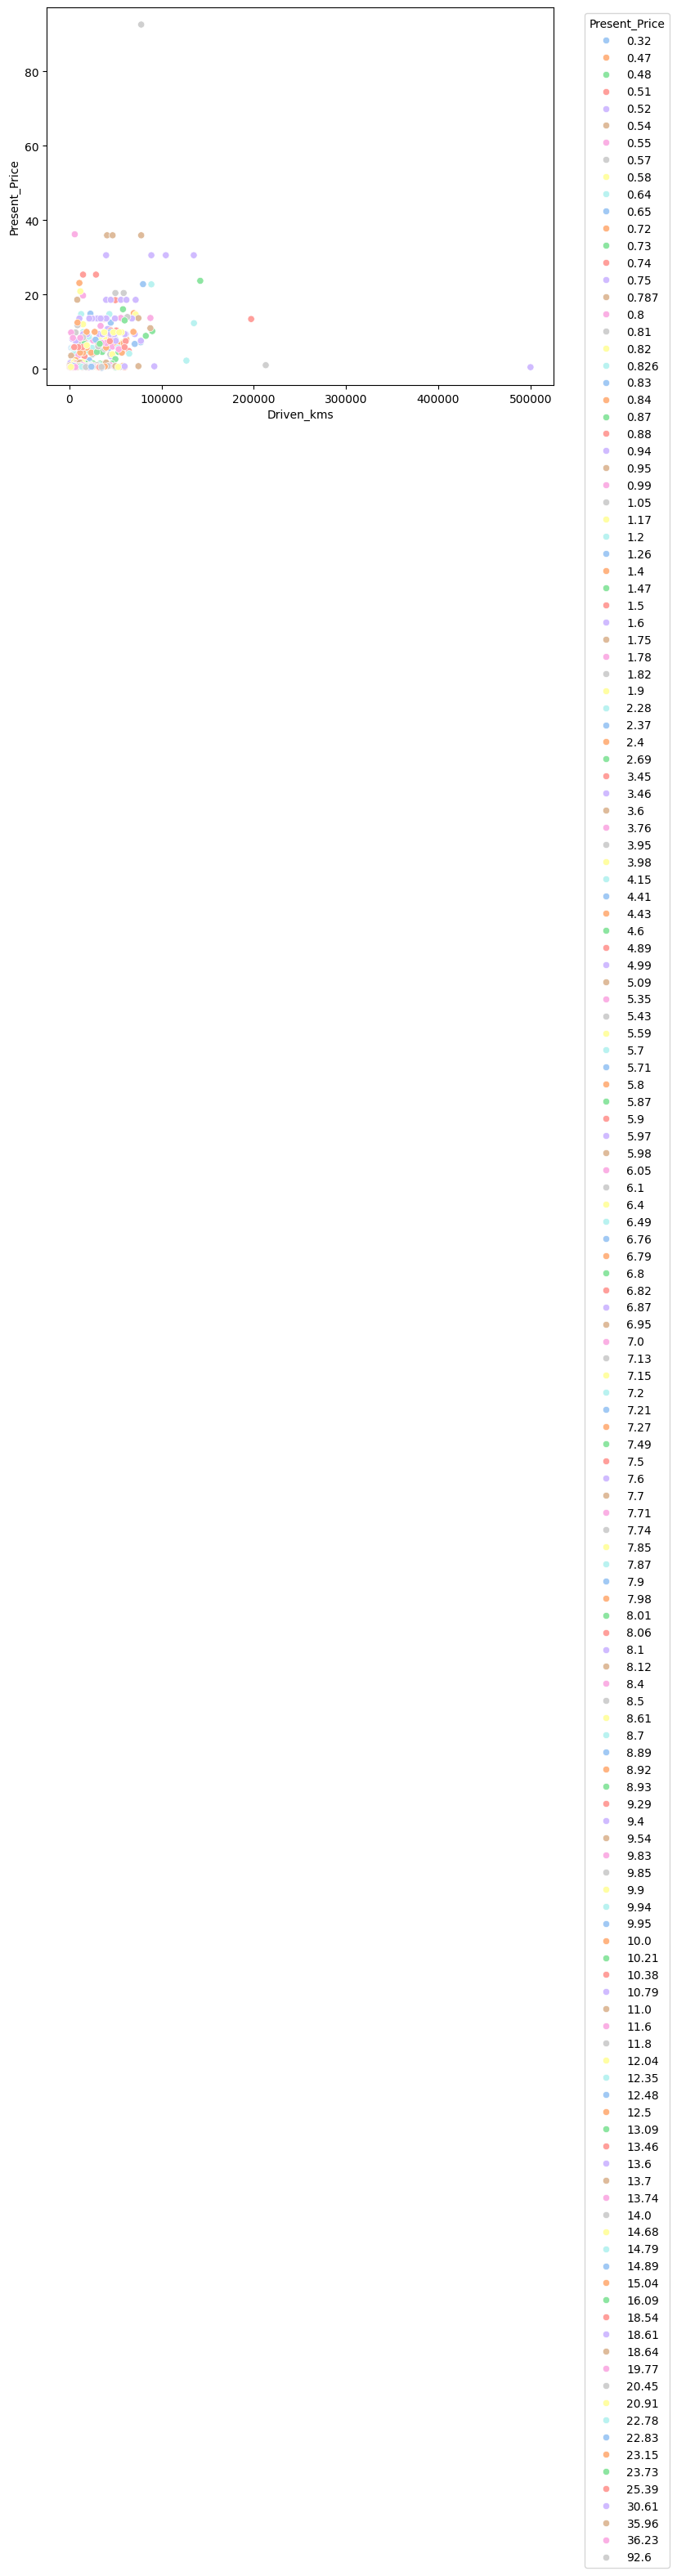

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Driven_kms", y="Present_Price", data=df, marker='o', hue="Present_Price", palette='pastel')
plt.legend(title="Present_Price", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

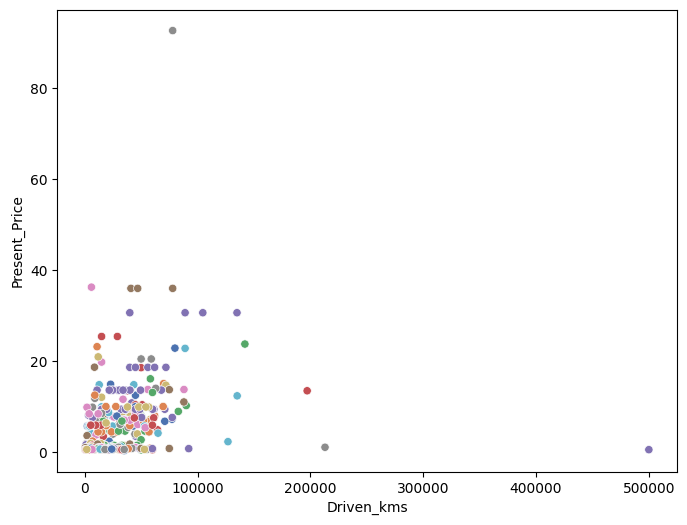

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Driven_kms", y="Present_Price", data=df, marker='o', hue="Present_Price", palette='deep', legend=False)
plt.show()


<Axes: ylabel='Selling_Price'>

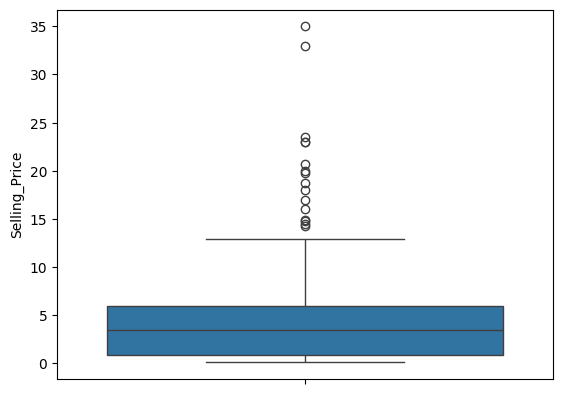

In [30]:
sns.boxplot(df['Selling_Price'])

<Axes: ylabel='Present_Price'>

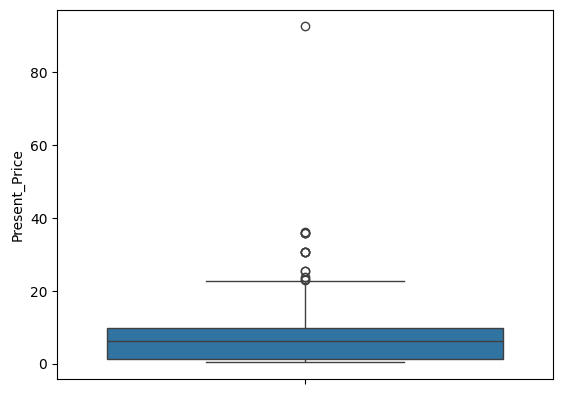

In [31]:
sns.boxplot(df['Present_Price'])

<Axes: xlabel='Fuel_Type_Diesel', ylabel='count'>

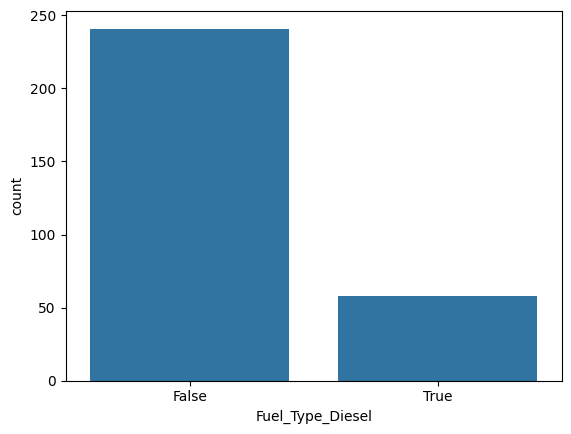

In [32]:
sns.countplot(x ='Fuel_Type_Diesel', data = df)

<Axes: xlabel='Fuel_Type_CNG', ylabel='count'>

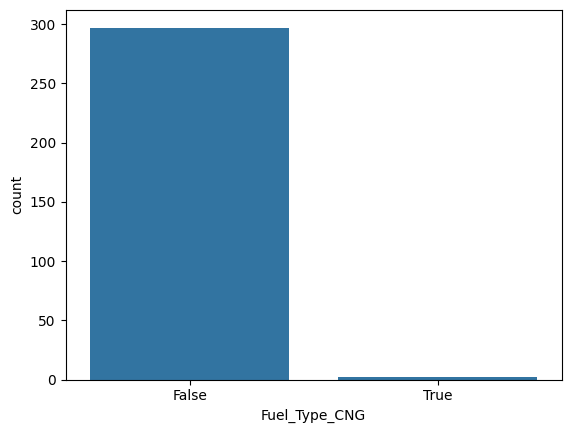

In [33]:
sns.countplot(x ='Fuel_Type_CNG', data = df)

<Axes: xlabel='Fuel_Type_Petrol', ylabel='count'>

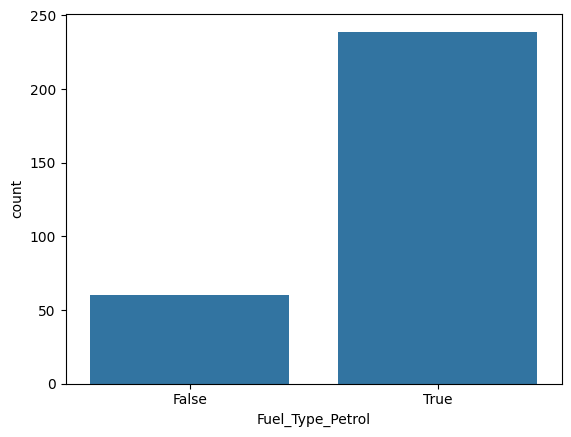

In [34]:
sns.countplot(x ='Fuel_Type_Petrol', data = df)


In [35]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type_CNG  \
0     ritz  2014           3.35           5.59       27000          False   
1      sx4  2013           4.75           9.54       43000          False   
2     ciaz  2017           7.25           9.85        6900          False   
3  wagon r  2011           2.85           4.15        5200          False   
4    swift  2014           4.60           6.87       42450          False   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Dealer  \
0             False              True                 True   
1              True             False                 True   
2             False              True                 True   
3             False              True                 True   
4              True             False                 True   

   Selling_type_Individual  Transmission_Automatic  Transmission_Manual  \
0                    False                   False                 True   
1             

In [36]:
!pip install xgboost

In [89]:
import xgboost as xgb

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(columns = ['Car_Name', 'Selling_Price'])
y = df['Selling_Price']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
model = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state = 42)

In [45]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [46]:
y_pred = model.predict(x_test)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
print(f'mean absolute error in prediction of model = {mean_absolute_error(y_test, y_pred)}')

mean absolute error in prediction of model = 1.0027037731309731


In [59]:
mse = mean_squared_error(y_test, y_pred)
smse = mse**0.5
print(f'amse = {smse:.4f}')

amse = 2.2833


In [54]:
print(f'r2 score of prediction = {r2_score(y_test, y_pred)}')

r2 score of prediction = 0.7977226956724623


In [60]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid = GridSearchCV(xgb.XGBRegressor(random_state=42), param, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [62]:
model_new = xgb.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 42)

In [63]:
model_new.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred_n = model_new.predict(x_test)

In [66]:
print(f'mean absolute error in prediction of model = {mean_absolute_error(y_test, y_pred_n)}')

mean absolute error in prediction of model = 0.845351254028889


In [67]:
mse = mean_squared_error(y_test, y_pred_n)
smse = mse**0.5
print(f'amse = {smse:.4f}')

amse = 1.8485


In [69]:
print(f'r2 score of prediction = {r2_score(y_test, y_pred_n)}')

r2 score of prediction = 0.8674266237787628


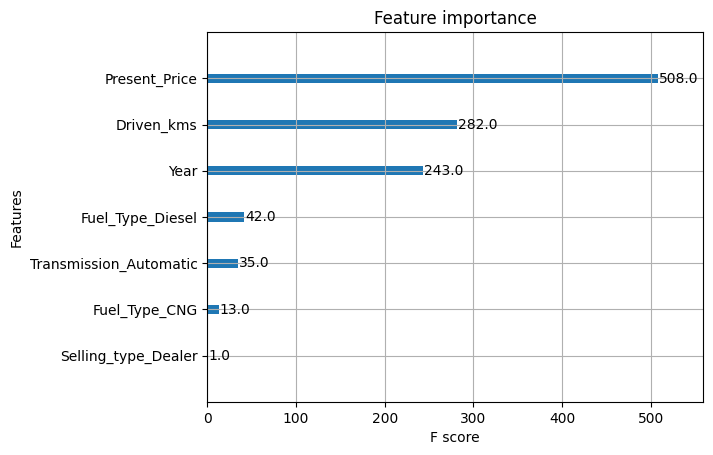

In [71]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(model_new)
plt.show()

In [85]:
x_train_n = x_train.drop(columns=['Selling_type_Dealer'])
x_test_n = x_test.drop(columns=['Selling_type_Dealer'])

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0]
}

random_search = RandomizedSearchCV(xgb.XGBRegressor(), param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1)
random_search.fit(x_train_n, y_train)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1}


In [94]:
model_newly = xgb.XGBRegressor(n_estimators = 400, learning_rate = 0.1, max_depth = 8, subsample = 0.7, random_state = 42)

In [96]:
model_newly.fit(x_train_n, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [97]:
y_pred_n = model_new.predict(x_test_n)

In [100]:
print(mean_absolute_error(y_test, y_pred_n))

1.0615588905513287


In [102]:
X_train_new = x_train.drop(columns=['Selling_type_Dealer', 'Fuel_Type_CNG'])
X_test_new = x_test.drop(columns=['Selling_type_Dealer', 'Fuel_Type_CNG'])

In [103]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=15, cv=5, scoring='r2', n_jobs=-1, verbose=2)
random_search.fit(X_train_new, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [105]:
best_parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [106]:
import xgboost as xgb

# Train model with optimized parameters
final_model = xgb.XGBRegressor(
    subsample=0.8,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.2,
    colsample_bytree=1.0,
    random_state=42
)

# Fit the model on the training data
final_model.fit(X_train_new, y_train)

# Make predictions
y_pred_final = final_model.predict(X_test_new)


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print(f"Final Model MAE: {mae:.4f}")
print(f"Final Model RMSE: {rmse:.4f}")
print(f"Final Model R² Score: {r2:.4f}")


Final Model MAE: 0.9289
Final Model RMSE: 2.0019
Final Model R² Score: 0.8445


In [108]:
import joblib

joblib.dump(final_model, 'car_model_reg.pkl')

['car_model_reg.pkl']